In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [ ]:
df_superstore = pd.read_excel('Dataset Global Superstore.xlsx')

In [ ]:
df_superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [ ]:
# pd.set_option('display.max_rows', df_superstore.shape[0]+1)
pd.set_option('display.max_rows', 5000)

## Data Inspection

In [ ]:
df_superstore.shape

(51290, 24)

In [ ]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Data Cleansing

In [ ]:
df_superstore.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
df_superstore[df_superstore.duplicated()].count()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

Delete Unnecessary Columns

In [ ]:
df_superstore.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code', 'Product ID'], axis=1, inplace=True)

In [ ]:
df_superstore.isnull().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

## Data Exploration

In [ ]:
df_superstore.shape[1]

19

- Sales : Hasil Penjualan 
- Quantity : Jumlah Penjualan
- Profit : Keuntungan
- Shipping Cost : Biaya Pengiriman

In [ ]:
df_superstore.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375818
std,487.565361,2.278766,0.212280,174.340972,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
df_superstore['Profit Ratio'] = df_superstore['Profit']/df_superstore['Sales']

- Ship Mode : Mode Pengiriman
- Segment : Segment dari Pelanggan
- Market : Wilayah Pemasaran pada Yuridiksi daerah tertentu
- Region : Daerah teritorial
- Category : Kategori Barang
- Sub-category : Cabang Kategori dari barang
- Order Priority : Prioritas Pengiriman

In [ ]:
df_superstore.describe(include=['O'])

,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,795,3,3636,1094,147,7,13,3,17,3788,4
top,Standard Class,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,Office Supplies,Binders,Staples,Medium
freq,30775,108,26518,915,2001,9994,11002,11117,31273,6152,227,29433


In [ ]:
for colname, coldata in df_superstore[['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']].iteritems():
    print(f'Unique Value of {colname} : {coldata.unique()}')

Unique Value of Ship Mode : ['Same Day' 'Second Class' 'First Class' 'Standard Class']
Unique Value of Segment : ['Consumer' 'Corporate' 'Home Office']
Unique Value of Market : ['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada']
Unique Value of Region : ['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']
Unique Value of Category : ['Technology' 'Furniture' 'Office Supplies']
Unique Value of Sub-Category : ['Accessories' 'Chairs' 'Phones' 'Copiers' 'Tables' 'Binders' 'Supplies'
 'Appliances' 'Machines' 'Bookcases' 'Storage' 'Furnishings' 'Art' 'Paper'
 'Envelopes' 'Fasteners' 'Labels']
Unique Value of Order Priority : ['Critical' 'Medium' 'High' 'Low']


# Exploratory Data Analysis

## Most Best Sales of Category
Quantity, Sales, Category, Subcategory

In [ ]:
df_superstore[['Category', 'Sub-Category', 'Quantity', 'Sales', 'Profit Ratio']]

,Category,Sub-Category,Quantity,Sales,Profit Ratio
0,Technology,Accessories,7,2309.650,0.330000
1,Furniture,Chairs,9,3709.395,-0.077847
2,Technology,Phones,9,5175.171,0.177766
3,Technology,Phones,5,2892.510,-0.033376
4,Technology,Copiers,8,2832.960,0.109963
...,...,...,...,...,...
51285,Office Supplies,Fasteners,5,65.100,0.069124
51286,Office Supplies,Appliances,1,0.444,-2.500000
51287,Office Supplies,Envelopes,3,22.920,0.490000
51288,Office Supplies,Binders,2,13.440,0.178571


Text(0, 0.5, 'Sales')

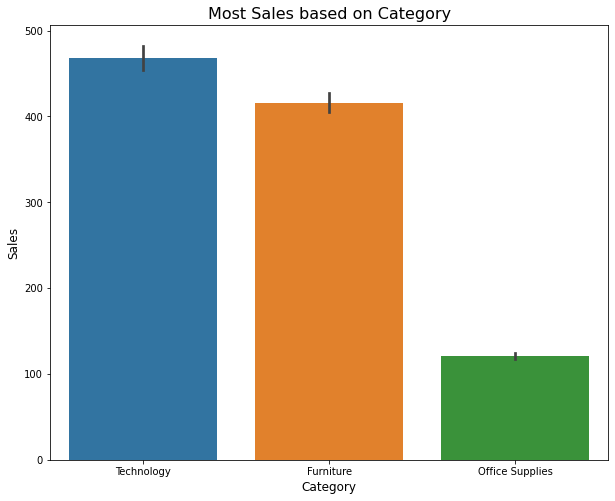

In [ ]:
# Set the figure size
plt.subplots(figsize=(10, 8))
sns.barplot(x='Category', y='Sales', data=df_superstore)

plt.title('Most Sales based on Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)

Text(0, 0.5, 'Profit')

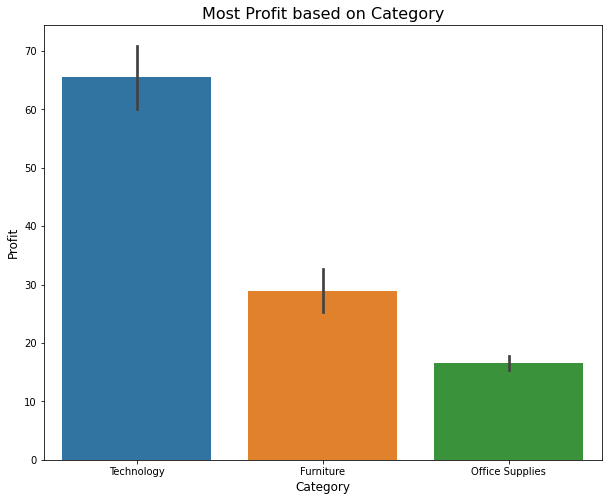

In [ ]:
# Set the figure size
plt.subplots(figsize=(10, 8))
sns.barplot(x='Category', y='Profit', data=df_superstore)

plt.title('Most Profit based on Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)

Text(0, 0.5, 'Profit Ratio')

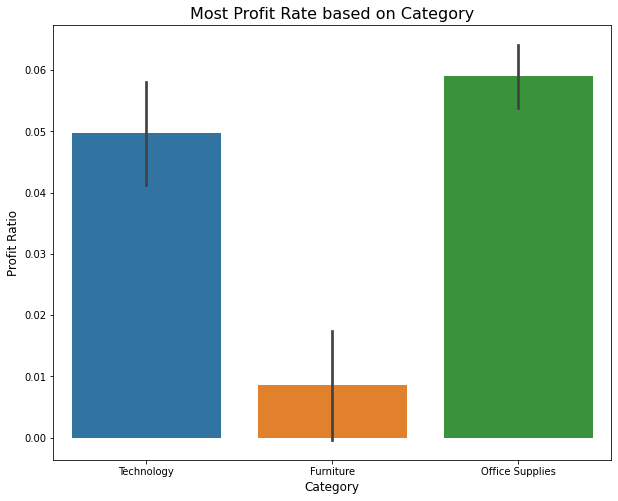

In [ ]:
# Set the figure size
plt.subplots(figsize=(10, 8))
sns.barplot(x='Category', y='Profit Ratio', data=df_superstore)

plt.title('Most Profit Rate based on Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit Ratio', fontsize=12)

Text(0, 0.5, 'Profit Ratio')

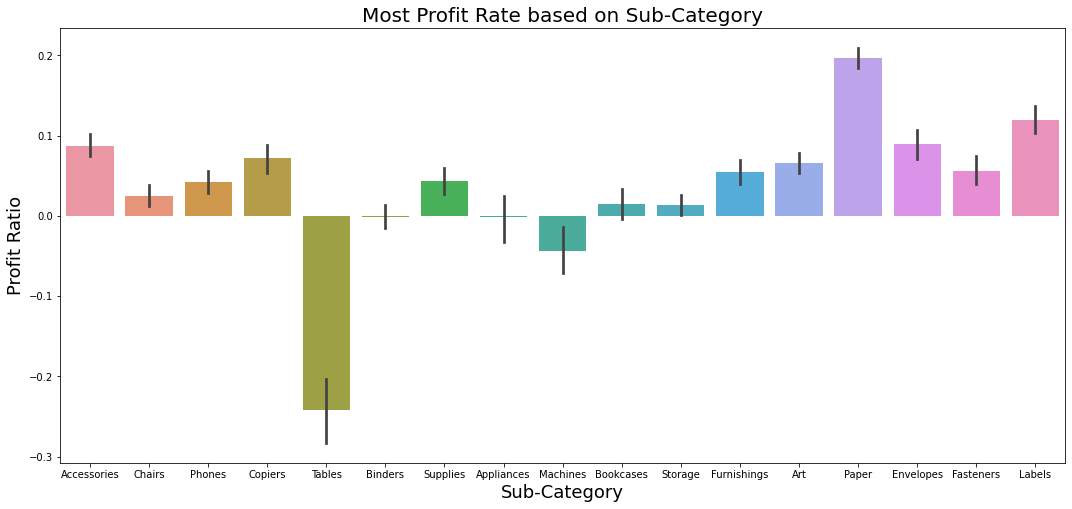

In [ ]:
# Set the figure size
plt.subplots(figsize=(18, 8))
sns.barplot(x='Sub-Category', y='Profit Ratio', data=df_superstore)

plt.title('Most Profit Rate based on Sub-Category', fontsize=20)
plt.xlabel('Sub-Category', fontsize=18)
plt.ylabel('Profit Ratio', fontsize=18)

## Segment with most Profit Ratio
Profit Ratio = Profit / Sales

In [ ]:
df_superstore[['Segment', 'Sales', 'Profit', 'Profit Ratio']]

,Segment,Sales,Profit,Profit Ratio
0,Consumer,2309.650,762.1845,0.330000
1,Corporate,3709.395,-288.7650,-0.077847
2,Consumer,5175.171,919.9710,0.177766
3,Home Office,2892.510,-96.5400,-0.033376
4,Consumer,2832.960,311.5200,0.109963
...,...,...,...,...
51285,Corporate,65.100,4.5000,0.069124
51286,Consumer,0.444,-1.1100,-2.500000
51287,Home Office,22.920,11.2308,0.490000
51288,Home Office,13.440,2.4000,0.178571


Text(0, 0.5, 'Revenue')

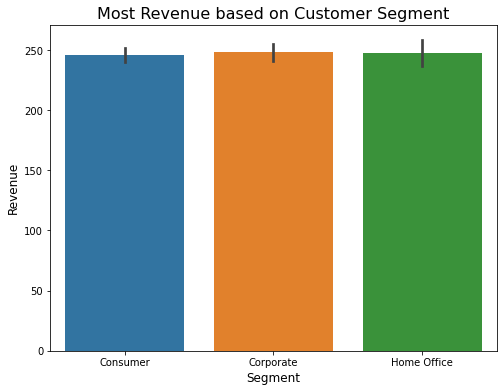

In [ ]:
plt.subplots(figsize=(8, 6))
sns.barplot(x='Segment', y='Sales', data=df_superstore)

plt.title('Most Revenue based on Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

Text(0, 0.5, 'Net Profit')

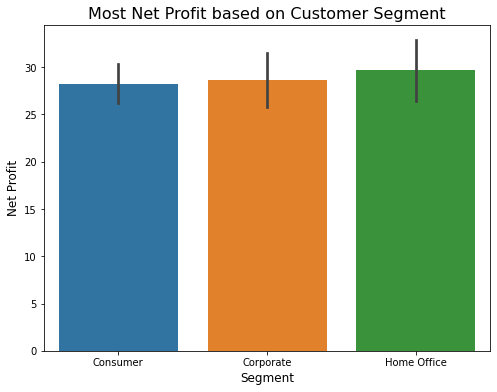

In [ ]:
plt.subplots(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit', data=df_superstore)

plt.title('Most Net Profit based on Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Net Profit', fontsize=12)

Text(0, 0.5, 'Profit Rate')

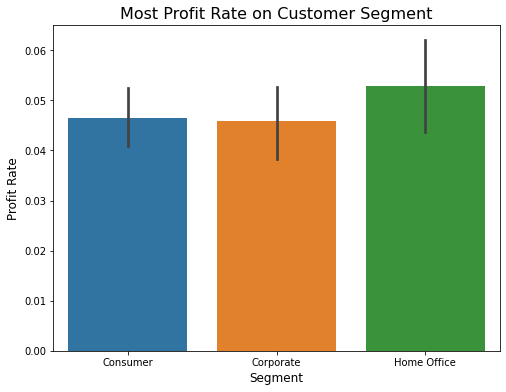

In [ ]:
plt.subplots(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit Ratio', data=df_superstore)

plt.title('Most Profit Rate on Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Profit Rate', fontsize=12)

## Region with The Most Profit

In [ ]:
df_superstore[['Region', 'Market', 'Sales', 'Profit','Profit Ratio']]

,Region,Market,Sales,Profit,Profit Ratio
0,East,US,2309.650,762.1845,0.330000
1,Oceania,APAC,3709.395,-288.7650,-0.077847
2,Oceania,APAC,5175.171,919.9710,0.177766
3,Central,EU,2892.510,-96.5400,-0.033376
4,Africa,Africa,2832.960,311.5200,0.109963
...,...,...,...,...,...
51285,North Asia,APAC,65.100,4.5000,0.069124
51286,Central,US,0.444,-1.1100,-2.500000
51287,West,US,22.920,11.2308,0.490000
51288,South,LATAM,13.440,2.4000,0.178571


Text(0, 0.5, 'Profit Rate')

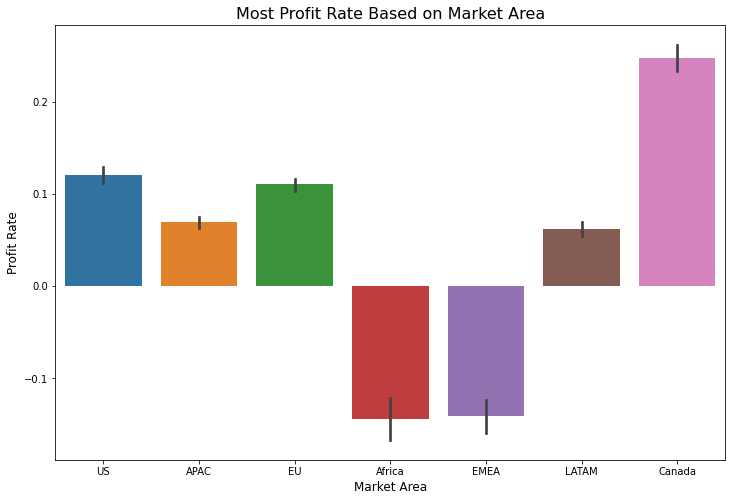

In [ ]:
plt.subplots(figsize=(12, 8))
sns.barplot(x='Market', y='Profit Ratio', data=df_superstore)

plt.title('Most Profit Rate Based on Market Area', fontsize=16)
plt.xlabel('Market Area', fontsize=12)
plt.ylabel('Profit Rate', fontsize=12)

Text(0, 0.5, 'Profit Rate')

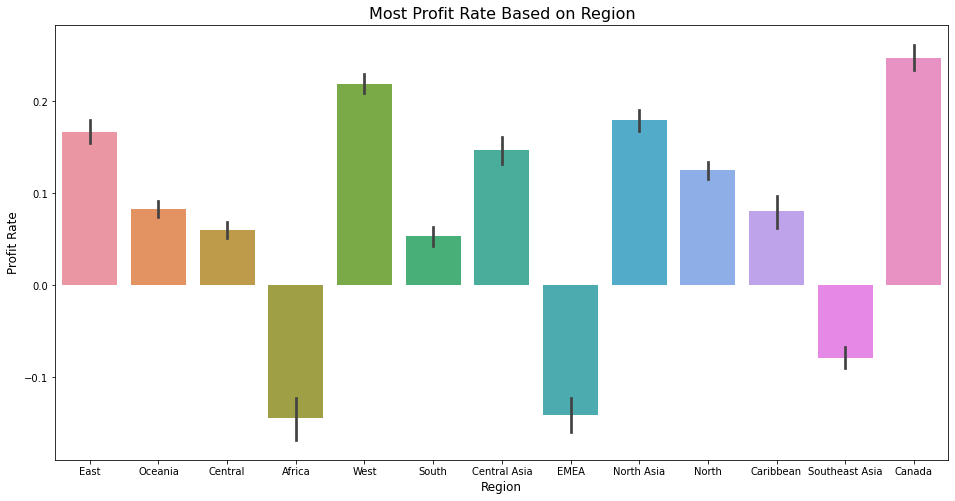

In [ ]:
plt.subplots(figsize=(16, 8))
sns.barplot(x='Region', y='Profit Ratio', data=df_superstore)

plt.title('Most Profit Rate Based on Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit Rate', fontsize=12)

## The Most Profitable of Ship Mode

In [ ]:
df_superstore[['Ship Mode', 'Sales', 'Shipping Cost', 'Profit', 'Profit Ratio']]

,Ship Mode,Sales,Shipping Cost,Profit,Profit Ratio
0,Same Day,2309.650,933.570,762.1845,0.330000
1,Second Class,3709.395,923.630,-288.7650,-0.077847
2,First Class,5175.171,915.490,919.9710,0.177766
3,First Class,2892.510,910.160,-96.5400,-0.033376
4,Same Day,2832.960,903.040,311.5200,0.109963
...,...,...,...,...,...
51285,Same Day,65.100,0.010,4.5000,0.069124
51286,Standard Class,0.444,0.010,-1.1100,-2.500000
51287,Same Day,22.920,0.010,11.2308,0.490000
51288,Standard Class,13.440,0.003,2.4000,0.178571


Text(0, 0.5, 'Quantity')

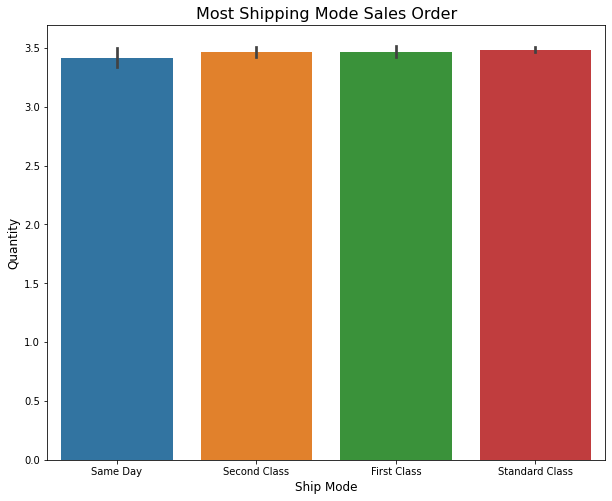

In [ ]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='Ship Mode', y='Quantity', data=df_superstore)

plt.title('Most Shipping Mode Sales Order', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

Text(0, 0.5, 'Profit Ratio')

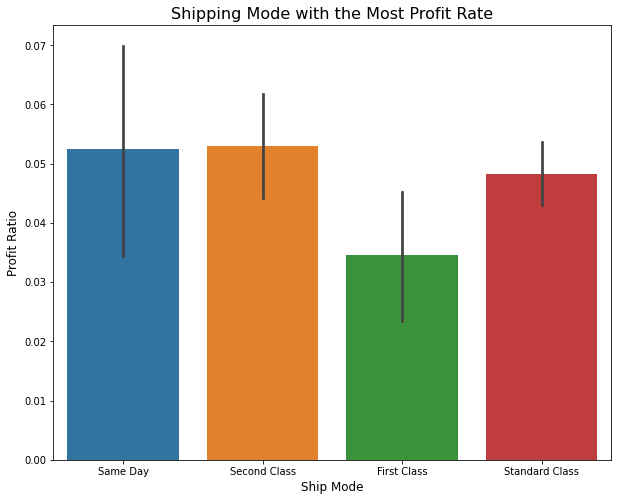

In [ ]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='Ship Mode', y='Profit Ratio', data=df_superstore)

plt.title('Shipping Mode with the Most Profit Rate', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Profit Ratio', fontsize=12)

Text(0, 0.5, 'Shipping Cost')

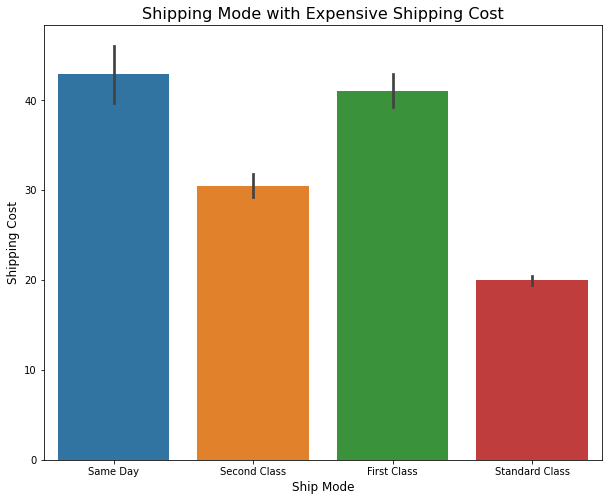

In [ ]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='Ship Mode', y='Shipping Cost', data=df_superstore)

plt.title('Shipping Mode with Expensive Shipping Cost', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Shipping Cost', fontsize=12)

## Effect of Discount on Profit

In [ ]:
df_superstore[['Sales', 'Discount', 'Profit', 'Profit Ratio']]

,Sales,Discount,Profit,Profit Ratio
0,2309.650,0.0,762.1845,0.330000
1,3709.395,0.1,-288.7650,-0.077847
2,5175.171,0.1,919.9710,0.177766
3,2892.510,0.1,-96.5400,-0.033376
4,2832.960,0.0,311.5200,0.109963
...,...,...,...,...
51285,65.100,0.0,4.5000,0.069124
51286,0.444,0.8,-1.1100,-2.500000
51287,22.920,0.0,11.2308,0.490000
51288,13.440,0.0,2.4000,0.178571


Correlation of Financial Features 

Text(0.5, 1.0, 'Correlation of Financial Features')

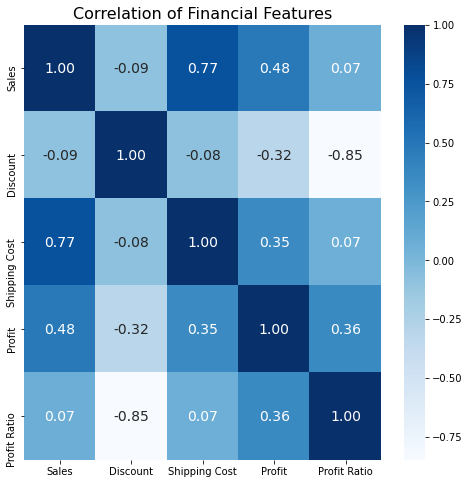

In [ ]:
financial_metrics = df_superstore[['Sales', 'Discount', 'Shipping Cost', 'Profit', 'Profit Ratio']]
financial_metrics

# correlation based on numeric variabel only
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(financial_metrics.corr(), fmt= '.2f', cmap='Blues', annot=True, annot_kws={"size":14})

plt.title('Correlation of Financial Features', fontsize=16)

Health of Margin based on Discount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Profit Rate')

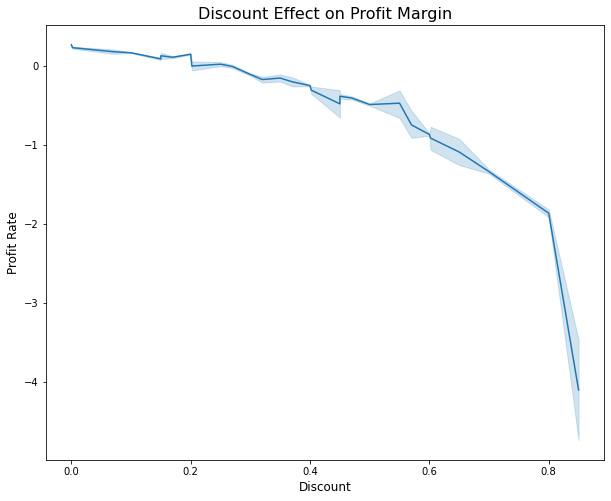

In [ ]:
plt.subplots(figsize=(10, 8))
sns.lineplot(df_superstore['Discount'], df_superstore['Profit Ratio'])

plt.title('Discount Effect on Profit Margin', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit Rate', fontsize=12)